                      Team          Week  PositiveRatio  NegativeRatio  \
0        Arizona Cardinals        Week 1       0.560079       0.439921   
291          Chicago Bears        Week 1       0.621749       0.378251   
290          Buffalo Bills        Week 1       0.538700       0.461300   
289       Baltimore Ravens        Week 1       0.586605       0.413395   
28   Washington Commanders        Week 1       0.674749       0.325251   
..                     ...           ...            ...            ...   
285    Philadelphia Eagles  Championship       0.602439       0.397561   
286  Washington Commanders  Championship       0.576402       0.423598   
284     Kansas City Chiefs  Championship       0.696607       0.303393   
287     Kansas City Chiefs    Super Bowl       0.520950       0.479050   
288    Philadelphia Eagles    Super Bowl       0.682809       0.317191   

     TotalComments  Div Home  Margin of Victory               Opponent  \
0             1007   No   No         

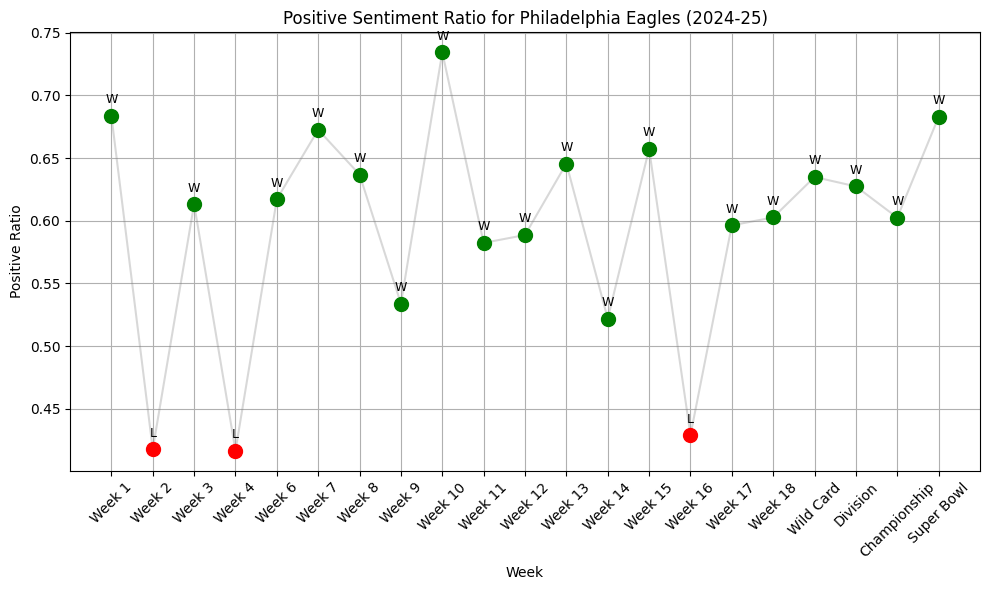

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Plot of the Eagles' Season

df = pd.read_csv('NFL 2024-25 Full.csv')

week_order = [
    "Week 1", "Week 2", "Week 3", "Week 4", "Week 5", "Week 6", "Week 7", "Week 8",
    "Week 9", "Week 10", "Week 11", "Week 12", "Week 13", "Week 14", "Week 15",
    "Week 16", "Week 17", "Week 18", "Wild Card", "Division", "Championship", "Super Bowl"
]

df["Week"] = pd.Categorical(df["Week"], categories=week_order, ordered=True)
df = df.sort_values("Week")

print(df)

eagles_df = df[df["Team"] == "Philadelphia Eagles"]



plt.figure(figsize=(10, 6))
plt.plot(eagles_df["Week"], eagles_df["PositiveRatio"], color='gray', linestyle='-', alpha=0.3)

for i, row in eagles_df.iterrows():
    color = 'green' if row["Win-Lose"] == 'W' else 'red'
    plt.scatter(row["Week"], row["PositiveRatio"], color=color, s=100, zorder=3)
    plt.text(row["Week"], row["PositiveRatio"] + 0.01, row["Win-Lose"], ha='center', fontsize=9)

plt.title("Positive Sentiment Ratio for Philadelphia Eagles (2024-25)")
plt.xlabel("Week")
plt.ylabel("Positive Ratio")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



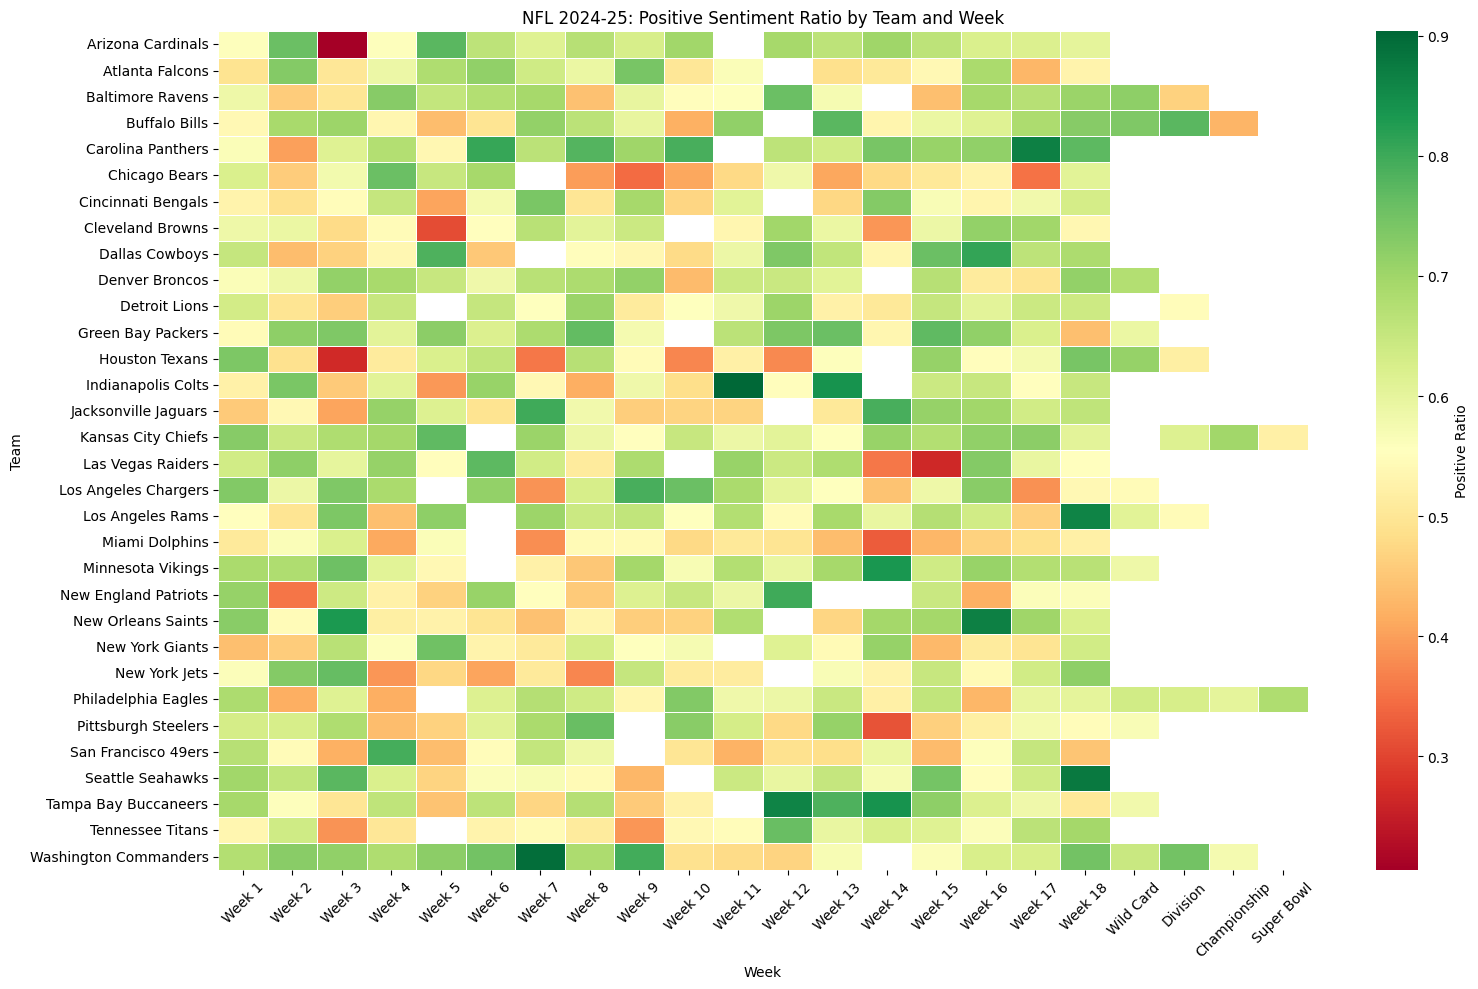

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#HeatMap code

df = pd.read_csv('NFL 2024-25 Full.csv')

week_order = [
    "Week 1", "Week 2", "Week 3", "Week 4", "Week 5", "Week 6", "Week 7", "Week 8",
    "Week 9", "Week 10", "Week 11", "Week 12", "Week 13", "Week 14", "Week 15",
    "Week 16", "Week 17", "Week 18", "Wild Card", "Division", "Championship", "Super Bowl"
]

df = df[df["Week"].isin(week_order)].copy()
df["Week"] = pd.Categorical(df["Week"], categories=week_order, ordered=True)

pivot_df = df.pivot(index="Team", columns="Week", values="PositiveRatio")

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, cmap="RdYlGn", linewidths=0.5, annot=False, cbar_kws={'label': 'Positive Ratio'})
plt.title("NFL 2024-25: Positive Sentiment Ratio by Team and Week")
plt.xlabel("Week")
plt.ylabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Preprocessing for Hot encoding

df = pd.read_csv('NFL 2024-25 Full.csv')

week_order = [
    "Week 1", "Week 2", "Week 3", "Week 4", "Week 5", "Week 6", "Week 7", "Week 8",
    "Week 9", "Week 10", "Week 11", "Week 12", "Week 13", "Week 14", "Week 15",
    "Week 16", "Week 17", "Week 18", "Wild Card", "Division", "Championship", "Super Bowl"
]
df = df[df["Week"].isin(week_order)].copy()
df["Week"] = pd.Categorical(df["Week"], categories=week_order, ordered=True).codes

binary_cols = ["Div", "Home", "Playoff", "Prime Time"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

df["Win-Lose"] = df["Win-Lose"].map({"W": 1, "L": 0})

features = [
     "PositiveRatio", "Div",
    "Home", "Playoff", "Prime Time", "Win-Lose", "Margin of Victory"
]
data = df[features].dropna()

scaler = StandardScaler()
X = scaler.fit_transform(data)


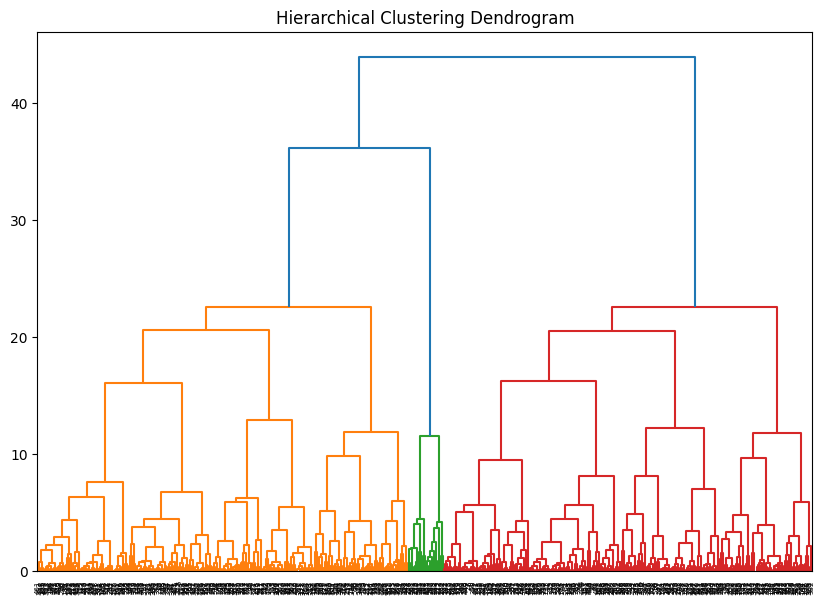

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

data_cluster = data.copy()

clusters = fcluster(linked, t=3, criterion='maxclust')
data_cluster['Cluster'] = clusters
cluster_summary = data_cluster.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


         PositiveRatio       Div      Home  Playoff  Prime Time  Win-Lose  \
Cluster                                                                     
1             0.546189  0.350554  0.483395      0.0    0.254613       0.0   
2             0.613547  0.153846  0.461538      1.0    1.000000       0.5   
3             0.649463  0.356618  0.533088      0.0    0.253676       1.0   

         Margin of Victory  
Cluster                     
1               -11.236162  
2                 0.000000  
3                11.194853  


In [ ]:
import pandas as pd

df = pd.read_csv("NFL 2024-25 Full.csv")

wins_df = df[df["Win-Lose"] == "W"].sort_values(by="PositiveRatio", ascending=False)

losses_df = df[df["Win-Lose"] == "L"].sort_values(by="PositiveRatio", ascending=False)


print("\nTop Losses by Positive Sentiment")
print(losses_df.head())

print("Bottom Wins by Positive Sentiment")
print(wins_df.tail())




Top Losses by Positive Sentiment
                   Team     Week  PositiveRatio  NegativeRatio  TotalComments  \
242   Carolina Panthers  Week 17       0.867995       0.132005            803   
418  New Orleans Saints  Week 16       0.866352       0.133648            636   
563    Los Angeles Rams  Week 18       0.861214       0.138786            807   
306  New Orleans Saints   Week 3       0.831407       0.168593           2076   
98    Carolina Panthers   Week 6       0.807560       0.192440            291   

     Div Home  Margin of Victory              Opponent Playoff Prime Time  \
242  Yes   No              -34.0  Tampa Bay Buccaneers      No         No   
418   No   No              -34.0     Green Bay Packers      No        Yes   
563  Yes  Yes               -5.0      Seattle Seahawks      No         No   
306   No  Yes               -3.0   Philadelphia Eagles      No         No   
98   Yes  Yes              -18.0       Atlanta Falcons      No         No   

    Win-Lose  
2

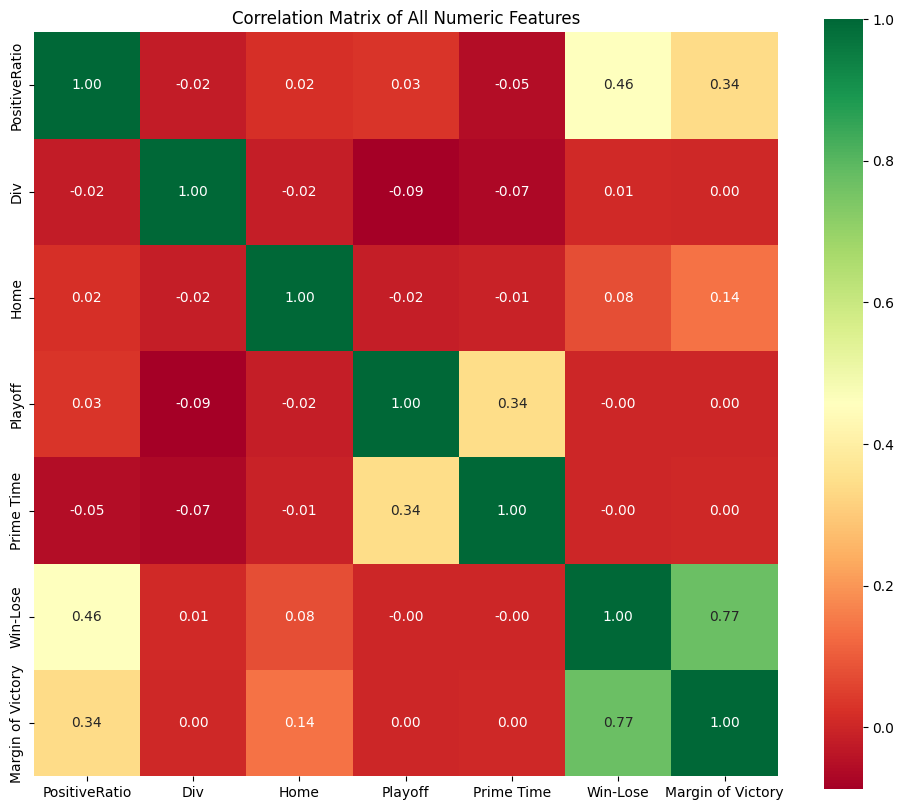

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = data.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='RdYlGn', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Matrix of All Numeric Features")
plt.show()
